In [4]:
!ls -al data*

-rw-r--r-- 1 root root 64088997 Oct 22 01:39 data.zip


In [7]:
!unzip -q data.zip -d data


In [8]:
# inspect the files
import subprocess

# prepare shell commands to count dog and cat images
count_dogs_cmd = "ls data/train/dog* -1 | wc -l"
count_cats_cmd = "ls data/train/cat* -1 | wc -l"

print('No of dog images: ' + subprocess.getoutput(count_dogs_cmd))
print('No of cat images: ' + subprocess.getoutput(count_cats_cmd))



No of dog images: 1000
No of cat images: 1000


In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import math

def display_images(file_list, columns=5, figure_size=(12, 12)):
    num_images = len(file_list)

    # Calculate the number of rows needed to display the images
    rows = int(math.ceil(num_images / columns))

    # Create a figure with the specified size
    plt.figure(figsize=figure_size)

    for i, filename in enumerate(file_list):
        # Create each subplot and set the size
        plt.subplot(rows, columns, i + 1)
        plt.title(os.path.basename(filename))
        image = mpimg.imread(filename)

        # Set the size of the individual subplots
        plt.imshow(image)
        plt.axis('off')  # Turn off axis labels and ticks

    plt.tight_layout()  # Automatically adjust subplot parameters for a better layout
    plt.show()

In [12]:
import os

def list_files_in_directory(directory_path):
    full_paths = [os.path.join(directory_path, file) for file in os.listdir(directory_path) if os.path.isfile(os.path.join(directory_path, file))]
    return full_paths


In [13]:
train_cats_dir = 'data/train/cats'
train_dogs_dir = 'data/train/dogs'
test_cats_dir = 'data/test/cats'
test_dogs_dir= 'data/test/dogs'


train_cat_files = list_files_in_directory(train_cats_dir)
train_dog_files = list_files_in_directory(train_dogs_dir)
test_cat_files = list_files_in_directory(test_cats_dir)
test_dog_files = list_files_in_directory(test_dogs_dir)

First 25 cat files for training: 



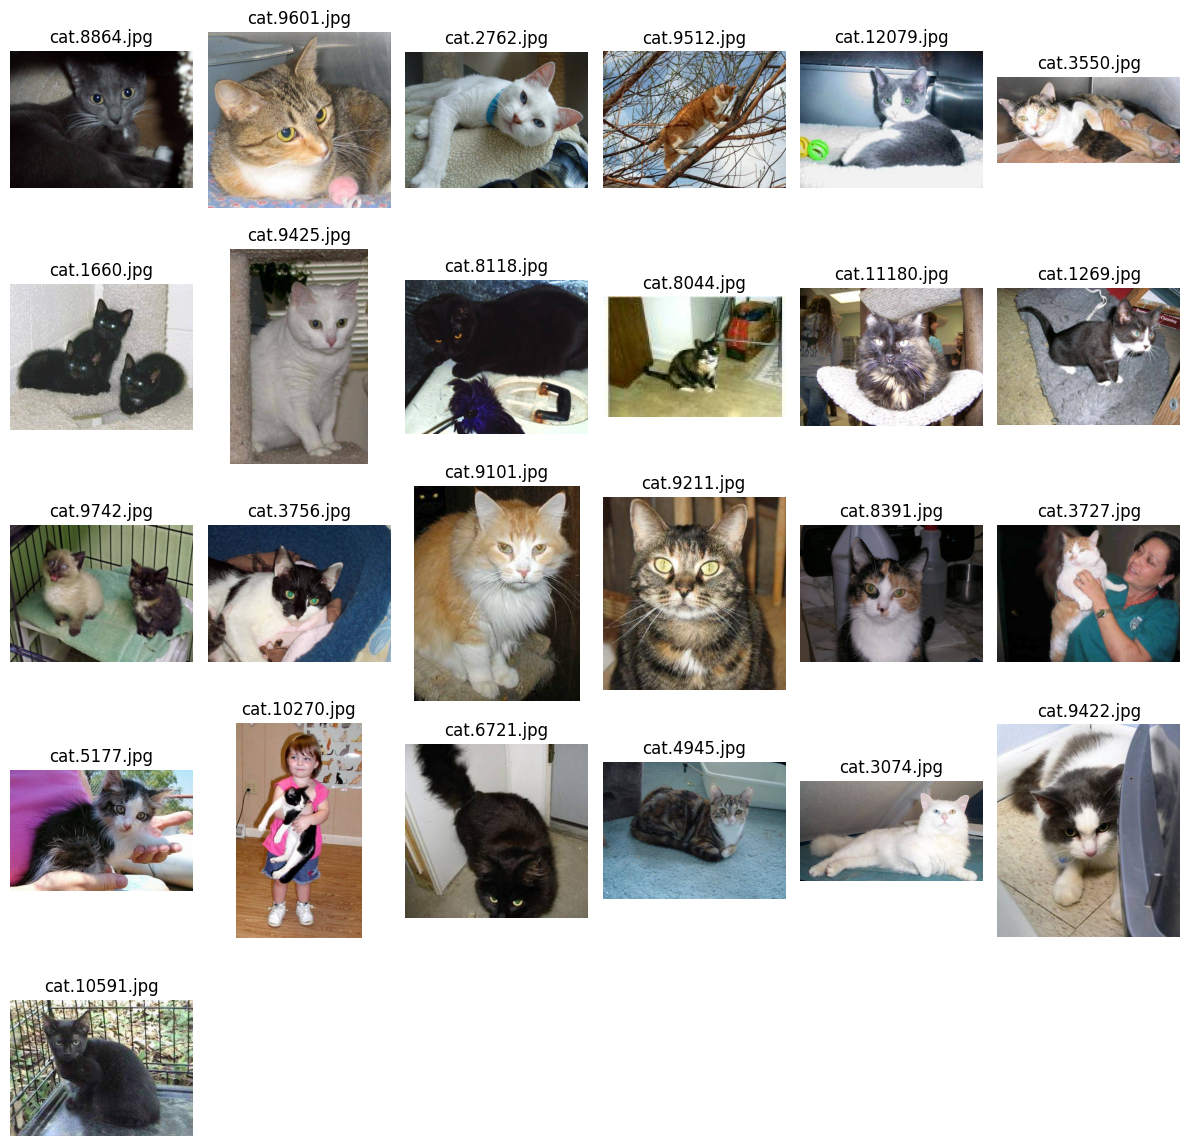

First 25 dog files for training: 



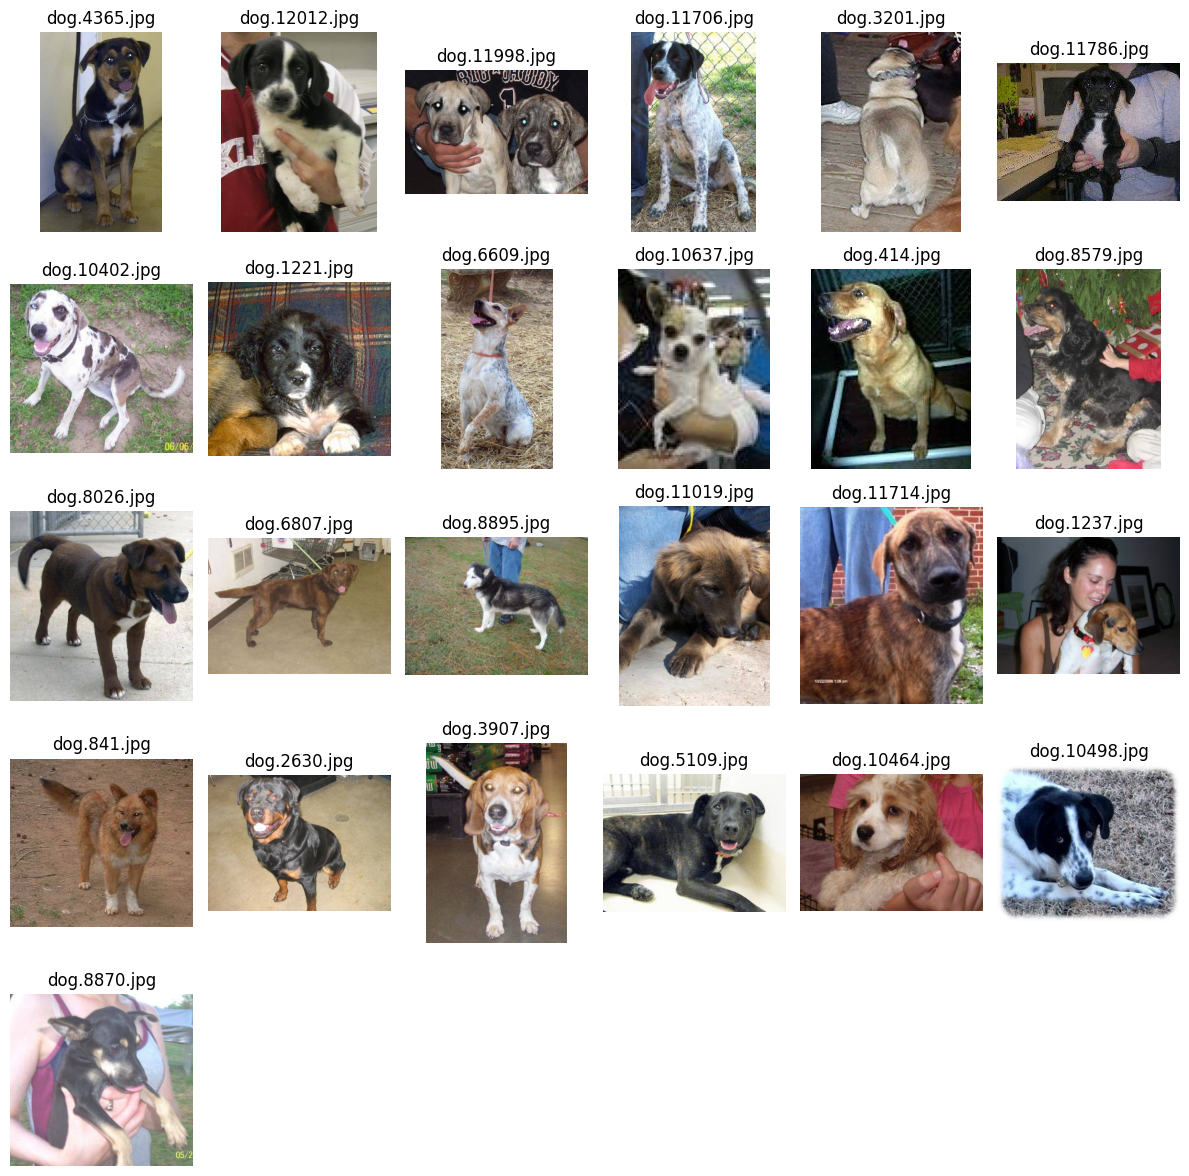

In [14]:
print('First 25 cat files for training: \n')
display_images(train_cat_files[:25],6)

print('First 25 dog files for training: \n')
display_images(train_dog_files[:25],6)

In [15]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Define data directories
train_data_dir = 'data/train'
test_data_dir = 'data/test'

# Set the image size according to InceptionV3's input size
img_width, img_height = 299, 299
batch_size = 32

# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Rescale for test images (no augmentation)
test_datagen = ImageDataGenerator(rescale=1. / 255)

# Load and augment training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load test data
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

# Load the InceptionV3 model pre-trained on ImageNet data
base_model = InceptionV3(weights='imagenet', include_top=False)

# Add custom layers on top of the pre-trained model for classification
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history=model.fit(train_generator, epochs=5, steps_per_epoch=len(train_generator), validation_data=test_generator, validation_steps=len(test_generator))

Found 2000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.
87910968/87910968 [==============================] - 3s 0us/step
Epoch 1/5
63/63 [==============================] - 65s 802ms/step - loss: 0.1603 - accuracy: 0.9470 - val_loss: 0.0309 - val_accuracy: 0.9900
Epoch 2/5
63/63 [==============================] - 48s 754ms/step - loss: 0.0281 - accuracy: 0.9870 - val_loss: 0.0495 - val_accuracy: 0.9812
Epoch 3/5
63/63 [==============================] - 47s 746ms/step - loss: 0.0300 - accuracy: 0.9920 - val_loss: 0.0307 - val_accuracy: 0.9887
Epoch 4/5
63/63 [==============================] - 49s 763ms/step - loss: 0.0193 - accuracy: 0.9945 - val_loss: 0.0941 - val_accuracy: 0.9800
Epoch 5/5
63/63 [==============================] - 49s 774ms/step - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0.0292 - val_accuracy: 0.9937


**Formatting floating point numbers as a string**  

The expression `"%.3f" % x` is used to format a numeric value `x` as a string with exactly three decimal places. 

Here's what each part of the expression does:

- `"%.3f"` is a formatting string. The `%` operator in this context is used to format a string, where `%f` is a placeholder for a floating-point number. 
    - The `.3` inside `%f` specifies that you want to format the number with three decimal places.

- `% x` is the value you want to insert into the formatting string. `x` is a variable that holds a numeric value.

When you use this expression, it takes the numeric value stored in `x`, formats it to have three decimal places, and returns it as a string. For example, if `x` is 3.14159265, `"%.3f" % x` would result in the string "3.142" because it rounds the number to three decimal places.

In [10]:
x = 5/23.0
print(x)
format_decimal = lambda x: "%.5f" % x
print("%.9f" % x)

0.21739130434782608
0.217391304
